In [107]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import tensorflow as tf
import time
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import   r2_score
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as k
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.layers import Flatten, Dense, Activation, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [2]:
dataset = sio.loadmat('./CNN_Airfoil/LD_RATIOS.mat')

X, Y, norm_f = dataset['data_x'], dataset['data_y'], dataset['Normalization_Factor']
count = np.shape(X)[0]
count

6855

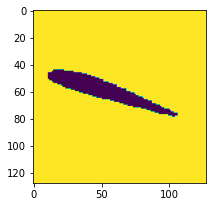

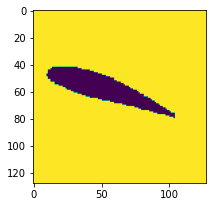

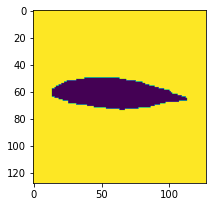

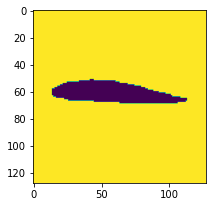

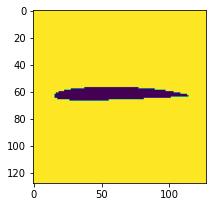

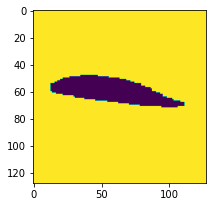

In [3]:
for i in range (6):
    rows = 2
    columns = 3
    fig = fig = plt.figure(figsize=(12, 7))
    fig.add_subplot(rows, columns, i+1)
    
    plt.imshow(X.reshape(-1,128,128)[i])
    plt.show()



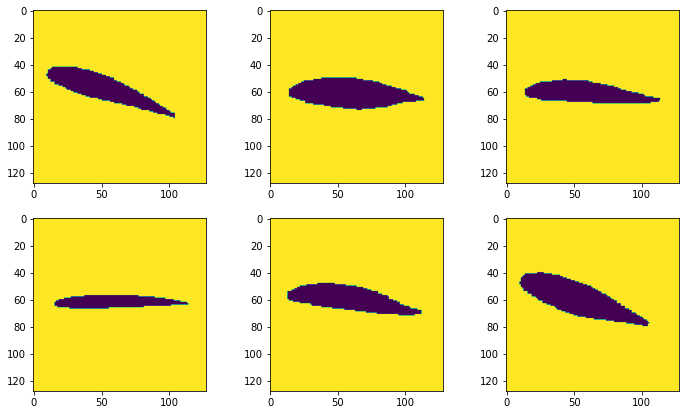

In [5]:
width = 128
height = 128
fig = plt.figure(figsize=(12, 7))
columns = 3
rows = 2
for i in range(1, 7):
    img = np.random.randint(10, size=(height,width))
    fig.add_subplot(rows, columns, i)
    plt.imshow(X.reshape(-1,128,128)[i])
plt.show()

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=10)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=10)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_val.shape)
print(Y_test.shape)

(3855, 16384)
(1286, 16384)
(1714, 16384)
(3855, 1)
(1286, 1)
(1714, 1)


In [7]:
X_train = X_train.reshape(-1,128,128,1)
X_val = X_val.reshape(-1,128,128,1)



In [88]:
img_w = 128
img_h = 128
img_c = 1

batch = 50
lr = 1e-5
eps = 50


In [89]:
model = Sequential()

model.add(Input(shape = (img_w,img_h,img_c)))
model.add(Conv2D(16, (9,9), padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))


model.add(Conv2D(32,(5,5), padding="same", activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))


model.add(Conv2D(64,(5,5), padding="same", activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))


model.add(Conv2D(128,(3,3), padding="same", activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(1296, activation='relu'))
model.add(Dense(784, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [90]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 128, 128, 16)      1312      
                                                                 
 batch_normalization_36 (Bat  (None, 128, 128, 16)     64        
 chNormalization)                                                
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 64, 64, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 64, 64, 32)        12832     
                                                                 
 batch_normalization_37 (Bat  (None, 64, 64, 32)       128       
 chNormalization)                                                
                                                      

In [91]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = lr ), loss=tf.keras.losses.MSE, metrics = ['mse'])

In [92]:
es = EarlyStopping(monitor='val_loss', mode='min', patience=5,
                       restore_best_weights=True, verbose=1)

In [112]:
R_lr = ReduceLROnPlateau(monitor = 'val_loss',
                                  factor = 0.3,
                                  patience = 3,
                                  min_lr = 1e-8,
                                  mode = 'min',
                                  verbose = 1)

In [114]:
cp = ModelCheckpoint("./best_weight_model.h5",
                                    save_best_only=True,
                                    monitor = 'val_loss',
                                    mode='min')

In [95]:
ss_train = len(X_train)//batch
ss_val = len(X_val)//batch

history = model.fit(x=X_train,y=Y_train, validation_data=(X_val,Y_val), 
                    steps_per_epoch = ss_train,
                    validation_steps = ss_val,
                    callbacks=[R_lr],
                    batch_size= batch,epochs= eps)

Epoch 1/50
77/77 [==============================] - 48s 611ms/step - loss: 0.0183 - mse: 0.0183 - val_loss: 0.1087 - val_mse: 0.1087 - lr: 1.0000e-05
Epoch 2/50
77/77 [==============================] - 46s 604ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0748 - val_mse: 0.0748 - lr: 1.0000e-05
Epoch 3/50
77/77 [==============================] - 46s 597ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0334 - val_mse: 0.0334 - lr: 1.0000e-05
Epoch 4/50
77/77 [==============================] - 46s 599ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 0.0163 - val_mse: 0.0163 - lr: 1.0000e-05
Epoch 5/50
77/77 [==============================] - 46s 602ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0117 - val_mse: 0.0117 - lr: 1.0000e-05
Epoch 6/50
77/77 [==============================] - 46s 602ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 0.0102 - val_mse: 0.0102 - lr: 1.0000e-05
Epoch 7/50
77/77 [==============================] - 46s 602ms/step - loss: 0.0016 - mse: 0.0016 - va

In [113]:
model.save_weights("Airfoil.h5")

In [96]:
pred = model.predict(X_test.reshape(-1,128,128,1))
pred.shape

54/54 [==============================] - 4s 64ms/step


(1714, 1)

In [99]:
Y_test.shape

(1714, 1)

In [100]:
r2_score(Y_test,pred)

0.80745856947145

In [101]:
Y_test

array([[ 0.31520945],
       [ 0.18785528],
       [-0.12247089],
       ...,
       [ 0.01311652],
       [ 0.25583615],
       [ 0.11649078]])

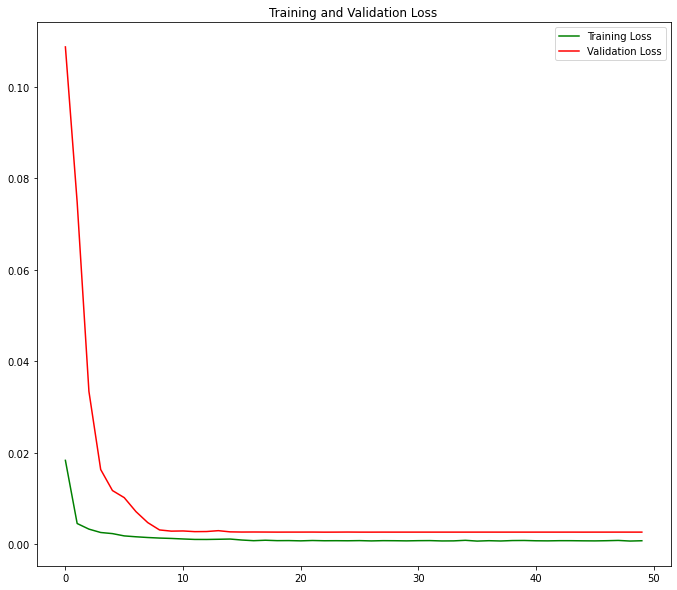

In [102]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(eps)

plt.figure(figsize=(25, 10))


plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', color='green')
plt.plot(epochs_range, val_loss, label='Validation Loss', color='red')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Text(0.5, 1.0, ' Actual & Predicted Cl/Cd Ratio')

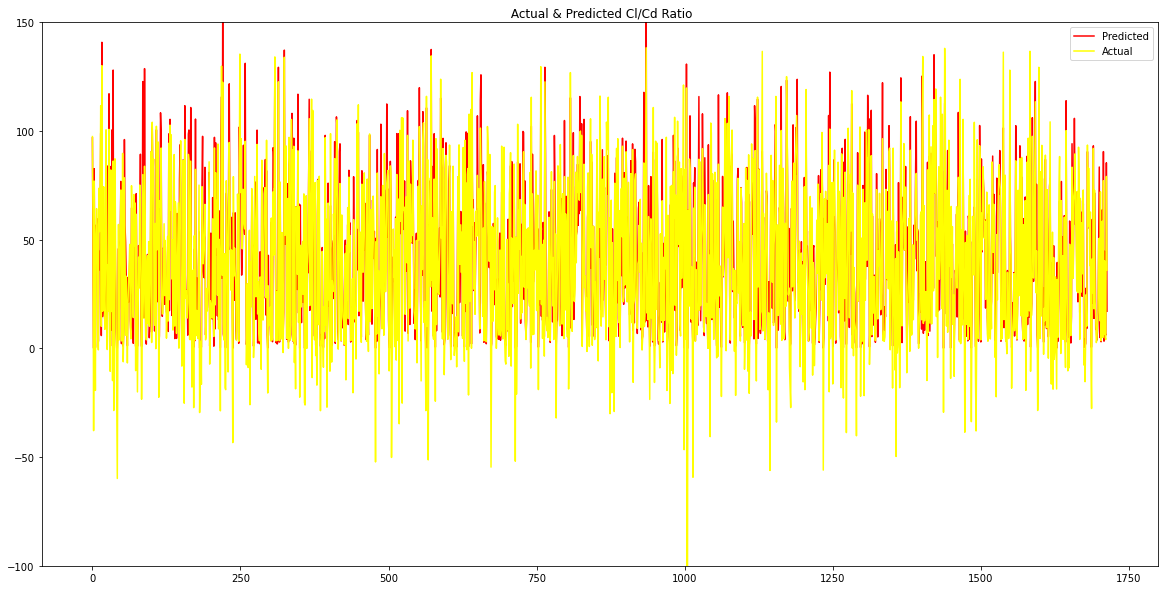

In [109]:
#denormalize
predyList = [x*norm_f[0,0] for x in pred]
testyList = [x*norm_f[0,0] for x in Y_test]
#plot result
plt.figure(figsize=(20, 10))
line3, = plt.plot(range(len(predyList)), predyList, alpha = 1.0,label = 'Predicted', color = 'red')
line4, = plt.plot(range(len(testyList)), testyList, label = 'Actual', color = 'yellow')
plt.ylim(-100,150)
plt.legend([line3,line4],['Predicted','Actual'])
plt.title(' Actual & Predicted Cl/Cd Ratio')

Text(0.5, 1.0, ' Test & Predicted Cl/Cd Ratio')

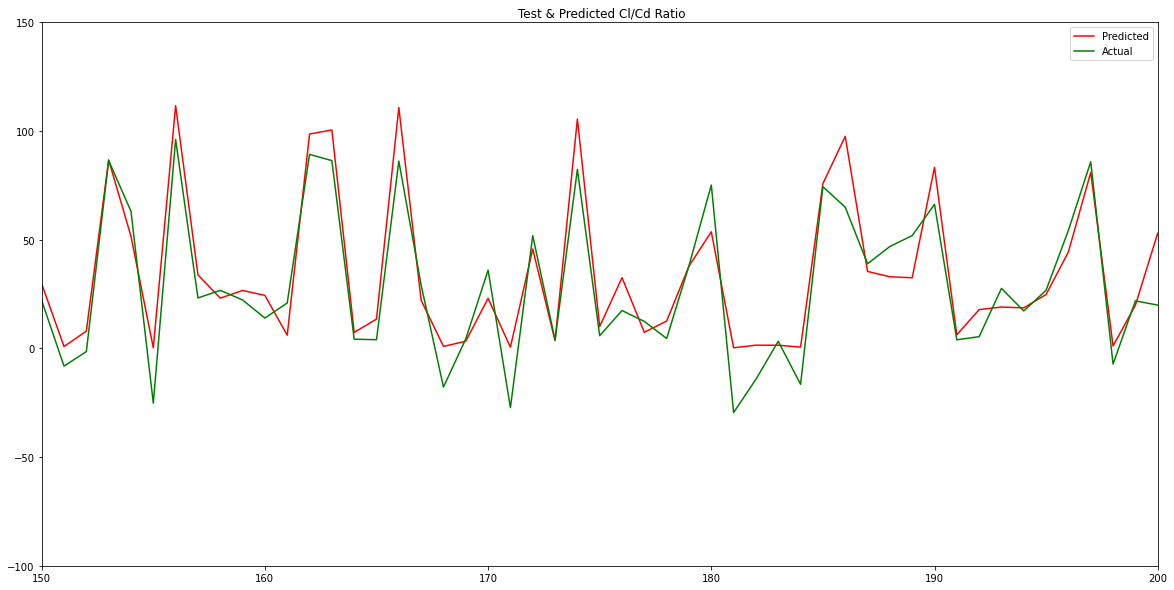

In [110]:
#plot result(zoom in)
plt.figure(figsize=(20,10))
line5, = plt.plot(range(len(predyList)), predyList, alpha = 1.0,label = 'Predicted', color = 'red')
line6, = plt.plot(range(len(testyList)), testyList, label = 'Actual', color = 'green')
plt.ylim(-100,150)
plt.xlim(150,200)
plt.legend([line5,line6],['Predicted','Actual'])
plt.title(' Test & Predicted Cl/Cd Ratio')